In [1]:
import os
import pandas as pd
import json
from collections import defaultdict
from collections import Counter

import matplotlib.pyplot as plt         # Visualisierung
import seaborn as sns

In [2]:
data_dir = r'corpus_finished'  # Replace with your actual directory

In [3]:
# Prüft die Files auf Verwendbarkeit; Erstellt DF; Zählt Autoren, Titel, Kategorien und Tokens für die jeweiligen Gender und Texte
all_files = os.listdir(data_dir)

df_list = []
category_counts = defaultdict(lambda: defaultdict(int))  # Stores the counts of categories for each gender
failed_files = 0

for filename in all_files:
    try:
        with open(os.path.join(data_dir, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)

            # Only process the file if it contains the 'categories' field
            if 'categories' in data:
                # Flatten the poem dictionary into a DataFrame
                poem_df = pd.DataFrame(data['poem']).T

                # Repeat the other columns for each line of the poem
                for column in ['title', 'gender', 'author']:
                    poem_df[column] = data[column]

                # Count each category for the corresponding gender
                for category in data['categories']:
                    category_counts[data['gender']][category] += 1

                df_list.append(poem_df)
    except Exception as e:
        print(f"Failed to process file {filename}: {e}")
        failed_files += 1

df = pd.concat(df_list)

# Function to calculate and print statistics
def print_stats(df, gender):
    gender_df = df[df['gender'] == gender]

    unique_titles = gender_df['title'].nunique()
    unique_authors = gender_df['author'].nunique()
    total_tokens = gender_df['text'].apply(lambda x: len(x.split())).sum()

    print(f"Gender {gender}:")
    print(f"Unique titles: {unique_titles}")
    print(f"Unique authors: {unique_authors}")
    print(f"Total tokens: {total_tokens}")

    # Print category counts
    category_dict = dict(category_counts[gender])
    sorted_categories = sorted(category_dict.items(), key=lambda item: item[1], reverse=True)
    print("Category counts:")
    for category, count in sorted_categories:
        print(f"{category}: {count}")

print_stats(df, 'm')

print_stats(df, 'w')

print(f"Number of files that failed to process: {failed_files}")



Gender m:
Unique titles: 135
Unique authors: 58
Total tokens: 21113
Category counts:
Leben & Beziehungen: 74
Natur: 65
Tiere: 18
Pflanzen: 17
Reimgedicht: 15
Landschaft: 13
Zeit: 9
Erinnerung: 8
Wasser: 8
Tod / Trauer: 7
Gesellschaft: 7
Humoristische Poesie: 6
Heimat: 6
Essen & Trinken: 6
Religion / Spiritualität: 6
Familie: 6
Liebe: 5
Dichtung: 5
Sprache: 5
Serien / Zyklen: 5
Körper: 5
Schreiben (Gedichte): 5
Identität (Individuum): 4
Gesellschaftskritik: 4
Lyrik für Kinder: 4
Sommer: 4
Stadt & städtisches Leben: 4
Medizin & Naturwissenschaft: 4
Photographie & Film: 3
Popkultur: 3
Alkohol & Drogen: 3
Arbeit: 3
Vater: 3
Winter: 3
Kultur & Wissenschaften: 3
Spoken Word / Rap: 3
Experimentelle Poesie: 3
Ehe: 2
Verlust & Trennung: 2
Philosophie: 2
Musik: 2
Reisen: 2
Kindheit & Jugend: 2
Theater & Tanz: 2
Identität (kollektiv): 2
Frühling: 2
Gestischer Rhythmus (= Betonte Enjambements): 2
Politische Lyrik: 2
Krieg: 2
Wirtschaft: 2
Architektur & Design: 2
Mutter: 2
Synkopen: 2
Geschichte: 2

In [4]:
# Funktion um den Korpus nach den Kategorien zu durchsuchen und die entsprechenden Dateien auszugeben
def get_file_info(category, directory):
    file_info = []

    # Gehe durch alle Dateien im Verzeichnis
    for filename in os.listdir(directory):
        # Überprüfe nur .json Dateien
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            # Lese die Datei als json
            with open(filepath, 'r', encoding='utf-8') as f:
                data = json.load(f)
                # Überprüfe, ob die Kategorie in der Liste 'categories' vorhanden ist
                if category in data.get('categories', []):
                    # Wenn ja, extrahiere zusätzliche Informationen
                    info = {
                        'filename': filename,
                        'gender': data.get('gender'),
                        'categories': data.get('categories')
                    }
                    
                    # Tokenisiere den Text des Gedichts und berechne die Anzahl der Token und die Wortfrequenz
                    poem_text = " ".join([line['text'] for line in data.get('poem', {}).values()])
                    tokens = poem_text.split()
                    info['token_count'] = len(tokens)
                    info['word_frequency'] = dict(Counter(tokens))
                    
                    file_info.append(info)

    return file_info

# Teste die Funktion
print(get_file_info('Ehe', r'corpus_finished'))


[{'filename': '125-episoden-imonki-16200.json', 'gender': 'm', 'categories': ['Leben & Beziehungen', 'Ehe', 'Verlust & Trennung', 'Tod / Trauer', 'Philosophie', 'Photographie & Film'], 'token_count': 537, 'word_frequency': {'125': 1, 'Episoden': 1, 'Monk': 1, '.': 1, 'In': 2, 'Worten:': 1, 'einhundertfünfundzwanzig': 1, 'Episoden,': 1, 'Monk!': 1, 'Stell': 1, 'dir': 1, 'vor,': 1, 'wie': 11, 'oft': 2, 'du': 6, 'mich': 2, 'begleitet': 1, 'hast': 1, 'in': 5, 'deiner': 1, 'Trauer,': 1, 'ohne': 2, 'Trudy,': 1, 'deine': 1, 'Frau,': 1, 'zu': 2, 'sein.': 3, 'Aber': 2, 'ja,': 1, 'denn': 1, 'eigentlich?': 1, 'Hast': 2, 'einmal': 2, 'nur': 2, 'erzählt,': 1, 'was': 3, 'hundertfünf-': 1, 'undzwanzigmal': 1, 'geschehen': 1, 'ist,': 2, 'o.': 3, 'hundertfünfundzwanzigmal,': 1, 'usw.': 1, 'usf.?': 1, 'alle': 2, 'widerlegt,': 1, 'Sigi': 1, 'den': 3, 'Beweis': 1, 'erbracht,': 1, 'dass': 3, 'Trauerarbeit': 1, 'eine': 1, 'Irreführung': 1, 'Werner': 1, 'plausibel': 1, 'vorgemacht,': 1, 'sogenannter': 1, 'Um

In [5]:
#Visualisierung

# Kategorien-Statistik nach Geschlecht
category_counts_per_gender = defaultdict(lambda: defaultdict(int))

# Prüft die Files auf Verwendbarkeit; Erstellt DF; Zählt Autoren, Titel, Kategorien und Tokens für die jeweiligen Gender
df_list = []
failed_files = 0

for filename in all_files:
    try:
        with open(os.path.join(data_dir, filename), 'r', encoding='utf-8') as f:
            data = json.load(f)

            # Only process the file if it contains the 'categories' field
            if 'categories' in data:
                # Flatten the poem dictionary into a DataFrame
                poem_df = pd.DataFrame(data['poem']).T

                # Repeat the other columns for each line of the poem
                for column in ['title', 'gender', 'author']:
                    poem_df[column] = data[column]

                # Count each category for the corresponding gender
                for category in data['categories']:
                    category_counts_per_gender[data['gender']][category] += 1

                df_list.append(poem_df)
    except Exception as e:
        print(f"Failed to process file {filename}: {e}")
        failed_files += 1

df = pd.concat(df_list)

# Gesamtanzahl von Tokens pro Gedicht und pro Geschlecht
df['total_tokens'] = df['text'].apply(lambda x: len(x.split()))
total_tokens_per_gender = df.groupby('gender')['total_tokens'].sum()

# Anzahl der Tokens pro Geschlecht
total_tokens = df['total_tokens'].sum()

# Function to calculate and print statistics
def print_stats(df, gender):
    gender_df = df[df['gender'] == gender]

    unique_titles = gender_df['title'].nunique()
    unique_authors = gender_df['author'].nunique()
    total_tokens = gender_df['total_tokens'].sum()

    print(f"Gender {gender}:")
    print(f"Unique titles: {unique_titles}")
    print(f"Unique authors: {unique_authors}")
    print(f"Total tokens: {total_tokens}")

print_stats(df, 'm')
print_stats(df, 'w')

Gender m:
Unique titles: 135
Unique authors: 58
Total tokens: 21113
Gender w:
Unique titles: 95
Unique authors: 37
Total tokens: 11745


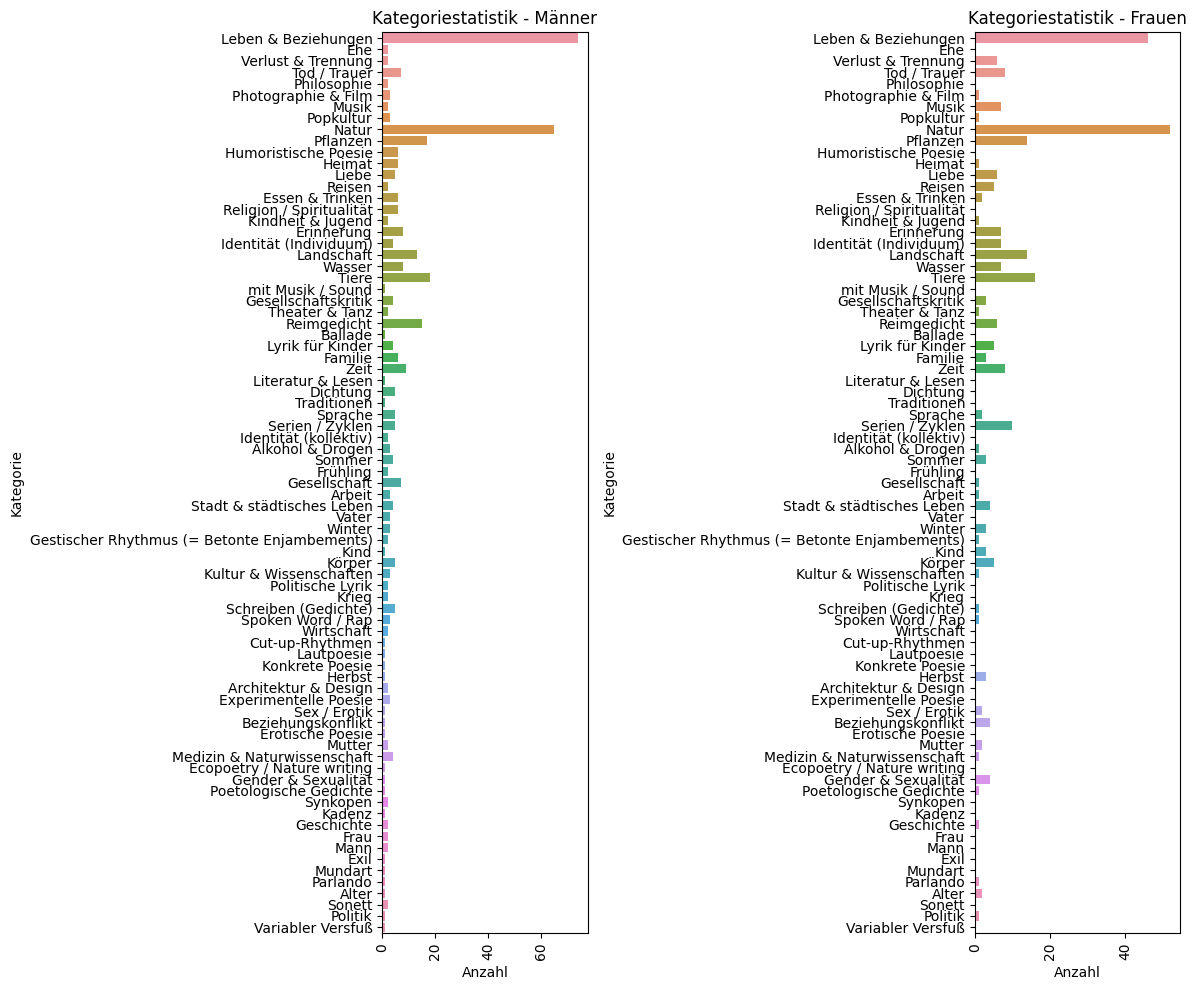

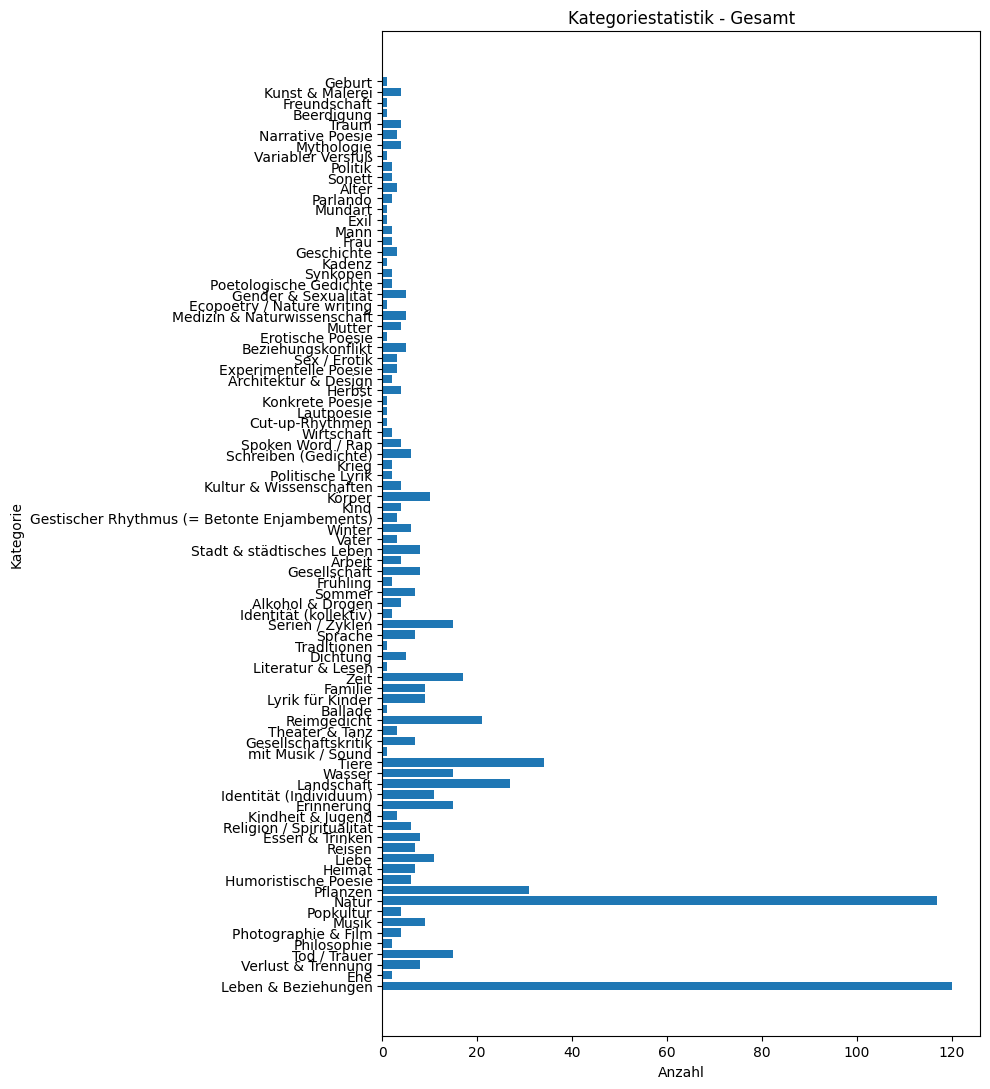

In [6]:

# Visualisierung der Kategoriestatistik nach Geschlecht
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
category_labels = list(category_counts_per_gender['m'].keys())
category_values_m = [category_counts_per_gender['m'].get(category, 0) for category in category_labels]

sns.barplot(x=category_values_m, y=category_labels)
plt.title('Kategoriestatistik - Männer')
plt.xlabel('Anzahl')
plt.ylabel('Kategorie')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
category_values_w = [category_counts_per_gender['w'].get(category, 0) for category in category_labels]

sns.barplot(x=category_values_w, y=category_labels)
plt.title('Kategoriestatistik - Frauen')
plt.xlabel('Anzahl')
plt.ylabel('Kategorie')
plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.5, bottom=0.3)  # Erhöht den Abstand zwischen den Subplots und den Kategorien

plt.tight_layout()
plt.show()

# Kategorien-Statistik insgesamt
plt.figure(figsize=(10, 11))
category_counts = defaultdict(int)
for gender in category_counts_per_gender:
    for category, count in category_counts_per_gender[gender].items():
        category_counts[category] += count

category_labels = list(category_counts.keys())
category_values = [category_counts.get(category, 0) for category in category_labels]

plt.barh(category_labels, category_values)
plt.title('Kategoriestatistik - Gesamt')
plt.xlabel('Anzahl')
plt.ylabel('Kategorie')

#plt.subplots_adjust(left=0.3)  # Erhöht den Abstand zwischen den Kategorien auf der y-Achse

plt.tight_layout()
plt.show()



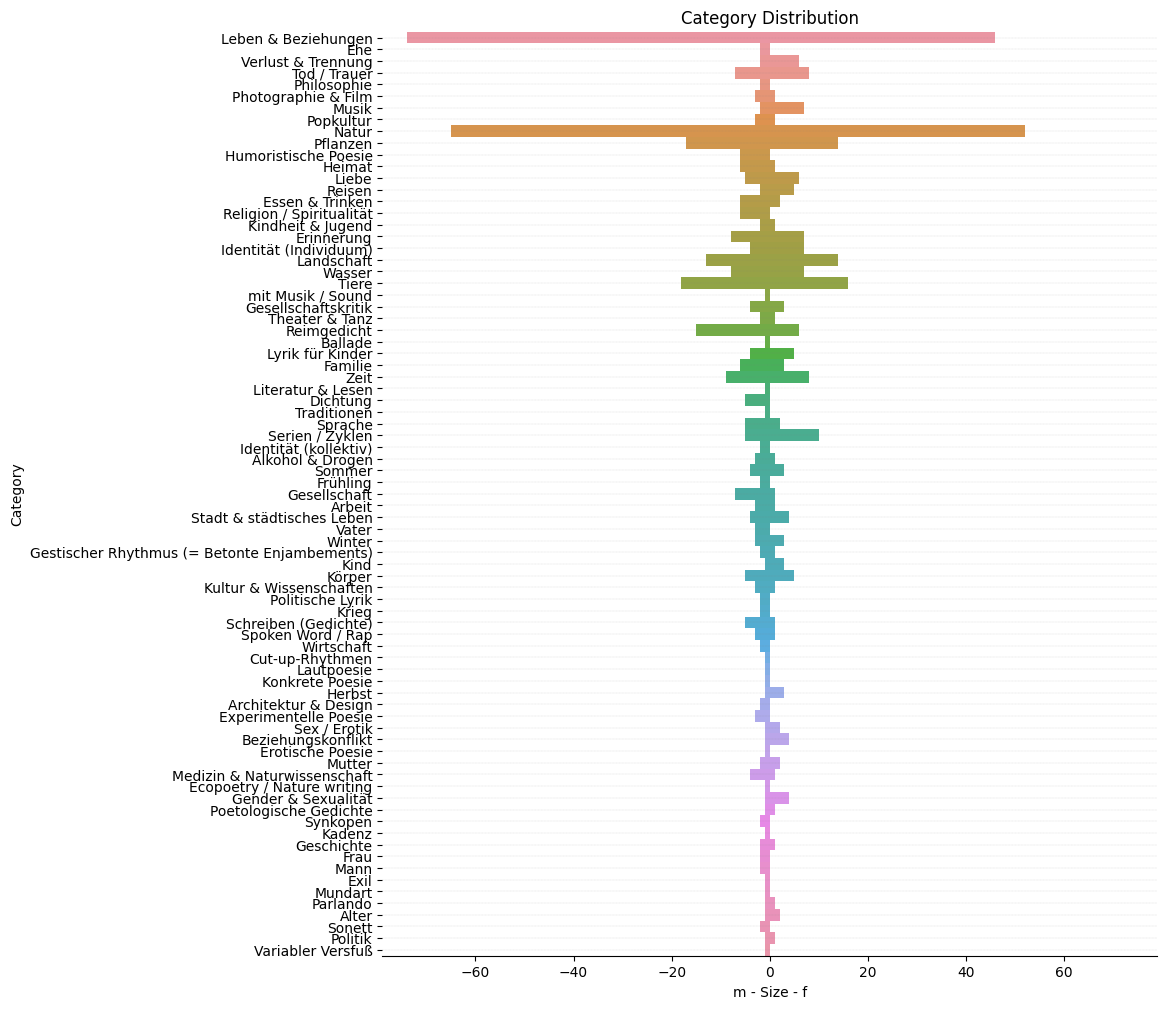

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 12))
bar_width = 1

# Plot male population on the left side
category_labels = list(category_counts_per_gender['m'].keys())
category_values_m = [category_counts_per_gender['m'].get(category, 0) for category in category_labels]
sns.barplot(x=-np.array(category_values_m), y=category_labels, ax=ax, width=bar_width)


# Plot female population on the right side
category_values_w = [category_counts_per_gender['w'].get(category, 0) for category in category_labels]
sns.barplot(x=np.array(category_values_w), y=category_labels, ax=ax, width=bar_width)

# Set x-axis limits
ax.set_xlim(-max(max(category_values_m), max(category_values_w)) - 5,
            max(max(category_values_m), max(category_values_w)) + 5)

# Set labels and title
ax.set_xlabel('m - Size - f')
ax.set_ylabel('Category')
ax.set_title('Category Distribution')

# Remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for y in range(len(category_labels)):
    plt.axhline(y, color='gray', linestyle='-.', linewidth=0.1)

# Show the plot
plt.show()